In [1]:
import os
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import matplotlib.ticker as mticker


In [2]:
print("="*80)
print("Keep Alive")
print("-"*80)

Keep Alive
--------------------------------------------------------------------------------


In [3]:
# ensure figures dir exists
os.makedirs('figures', exist_ok=True)

## Read Data

In [4]:
DATA_DIR = '../dataset/keep_alive'

In [5]:
# read aws data
with open(os.path.join(DATA_DIR, "aws/results_big_step.json")) as f:
    aws_data_1 = json.load(f)
with open(os.path.join(DATA_DIR, "aws/results_small_step.json")) as f:
    aws_data_2 = json.load(f)

In [6]:
# read azure data
with open(os.path.join(DATA_DIR, "azure/results_big_step.json")) as f:
    azure_data_1 = json.load(f)
with open(os.path.join(DATA_DIR, "azure/results_small_step.json")) as f:
    azure_data_2 = json.load(f)

In [7]:
# read gcp data
with open(os.path.join(DATA_DIR, "gcp/results_big_step.json")) as f:
    gcp_data_1 = json.load(f)
with open(os.path.join(DATA_DIR, "gcp/results_small_step.json")) as f:
    gcp_data_2 = json.load(f)

## Process Data

In [8]:
aws_data = aws_data_1 | aws_data_2
azure_data = azure_data_1 | azure_data_2
gcp_data = gcp_data_1 | gcp_data_2
# convert to probability of cold starts at each idle time
aws_data = {int(k): v['cold']/(v['cold']+v['warm']) for k, v in aws_data.items()}
azure_data = {int(k): v['cold']/(v['cold']+v['warm']) for k, v in azure_data.items()}
gcp_data = {int(k): v['cold']/(v['cold']+v['warm']) for k, v in gcp_data.items()}

## Plotting

Figure saved as figures/cold-start-probability.pdf


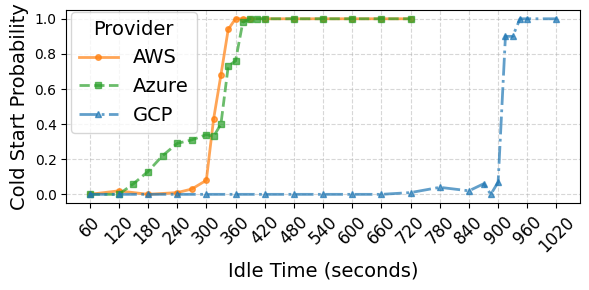

In [9]:
# Prepare figure + single axis
fig, ax = plt.subplots(figsize=(6, 3))

linestyles_list = ['solid', 'dashed', 'dashdot']
markers_list = ['o', 's', '^']

# Loop over each provider’s data
i = 0
for data, label, color in (
    (aws_data,   'AWS',   'tab:orange'),
    (azure_data, 'Azure', 'tab:green'),
    (gcp_data,   'GCP',   'tab:blue'),
):
    # sort idle times and get probabilities in order
    x = sorted(data.keys())
    y = [data[k] for k in x]

    ax.plot(x, y,
            label=label,
            color=color,
            marker=markers_list[i],
            markersize=4,
            linestyle=linestyles_list[i],
            linewidth=2,
            alpha=0.7)
    i += 1

# Axis titles
ax.set_xlabel('Idle Time (seconds)', fontsize=14)
ax.set_ylabel('Cold Start Probability', fontsize=14)

# Tick formatting: every 60s, rotated labels
ax.xaxis.set_major_locator(mticker.MultipleLocator(60))
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
ax.tick_params(axis='x', labelsize=12, rotation=45)

# Grid and legend
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.legend(title='Provider', fontsize=14, title_fontsize=14, loc='upper left', bbox_to_anchor=(-0.01, 1.04))

# Tight layout and save
fig.tight_layout()
fig.savefig("figures/cold-start-probability.pdf", dpi=300, bbox_inches='tight')
print("Figure saved as figures/cold-start-probability.pdf")
plt.show()